In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Exploratory Data Analysis (EDA)

In [2]:
mushroom = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/SVM/mushroom.csv")
mushroom

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


Basic exploration

In [17]:
print("Dataset Info:\n", mushroom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [18]:
print("\nMissing Values:\n", mushroom.isnull().sum())


Missing Values:
 Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


Histogram for cap diameter (numeric column)

Text(0, 0.5, 'Count')

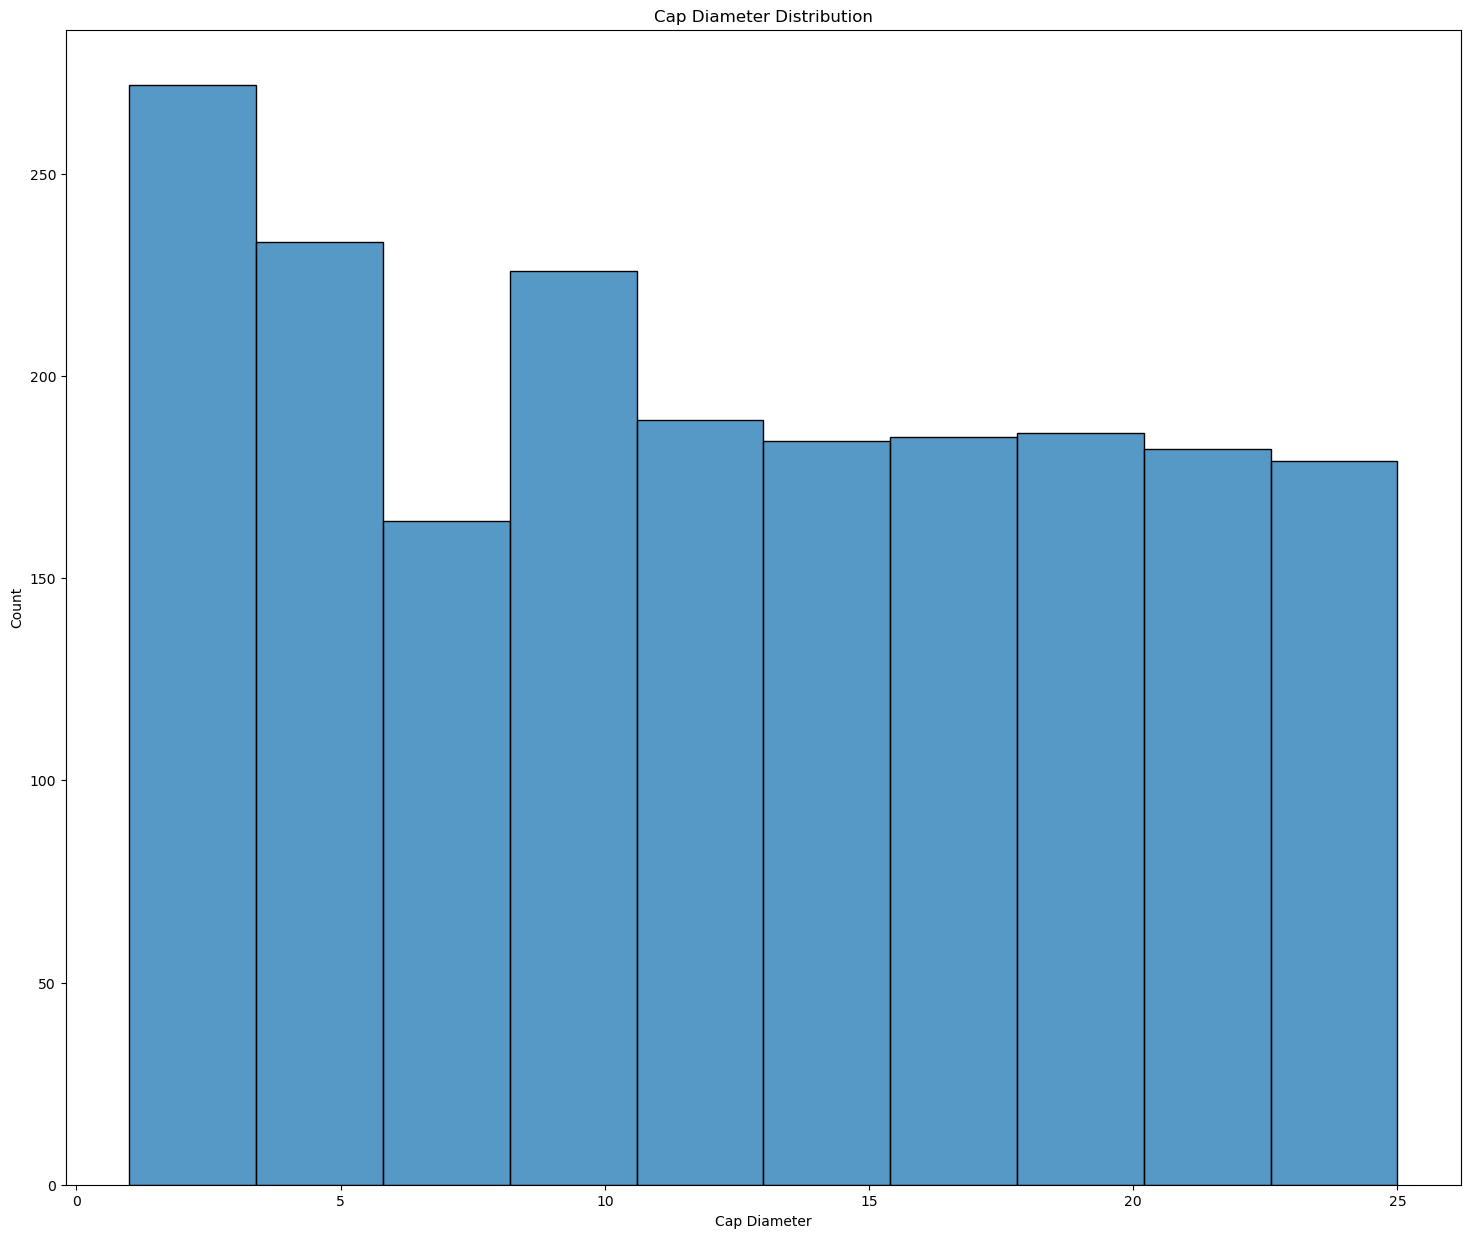

In [6]:
plt.figure(figsize=(18, 15))
sns.histplot(mushroom['cap_diameter'], bins=10)
plt.title('Cap Diameter Distribution')
plt.xlabel('Cap Diameter')
plt.ylabel('Count')

Boxplot for stalk height (numeric column)

Text(0.5, 1.0, 'Boxplot of Stalk Height')

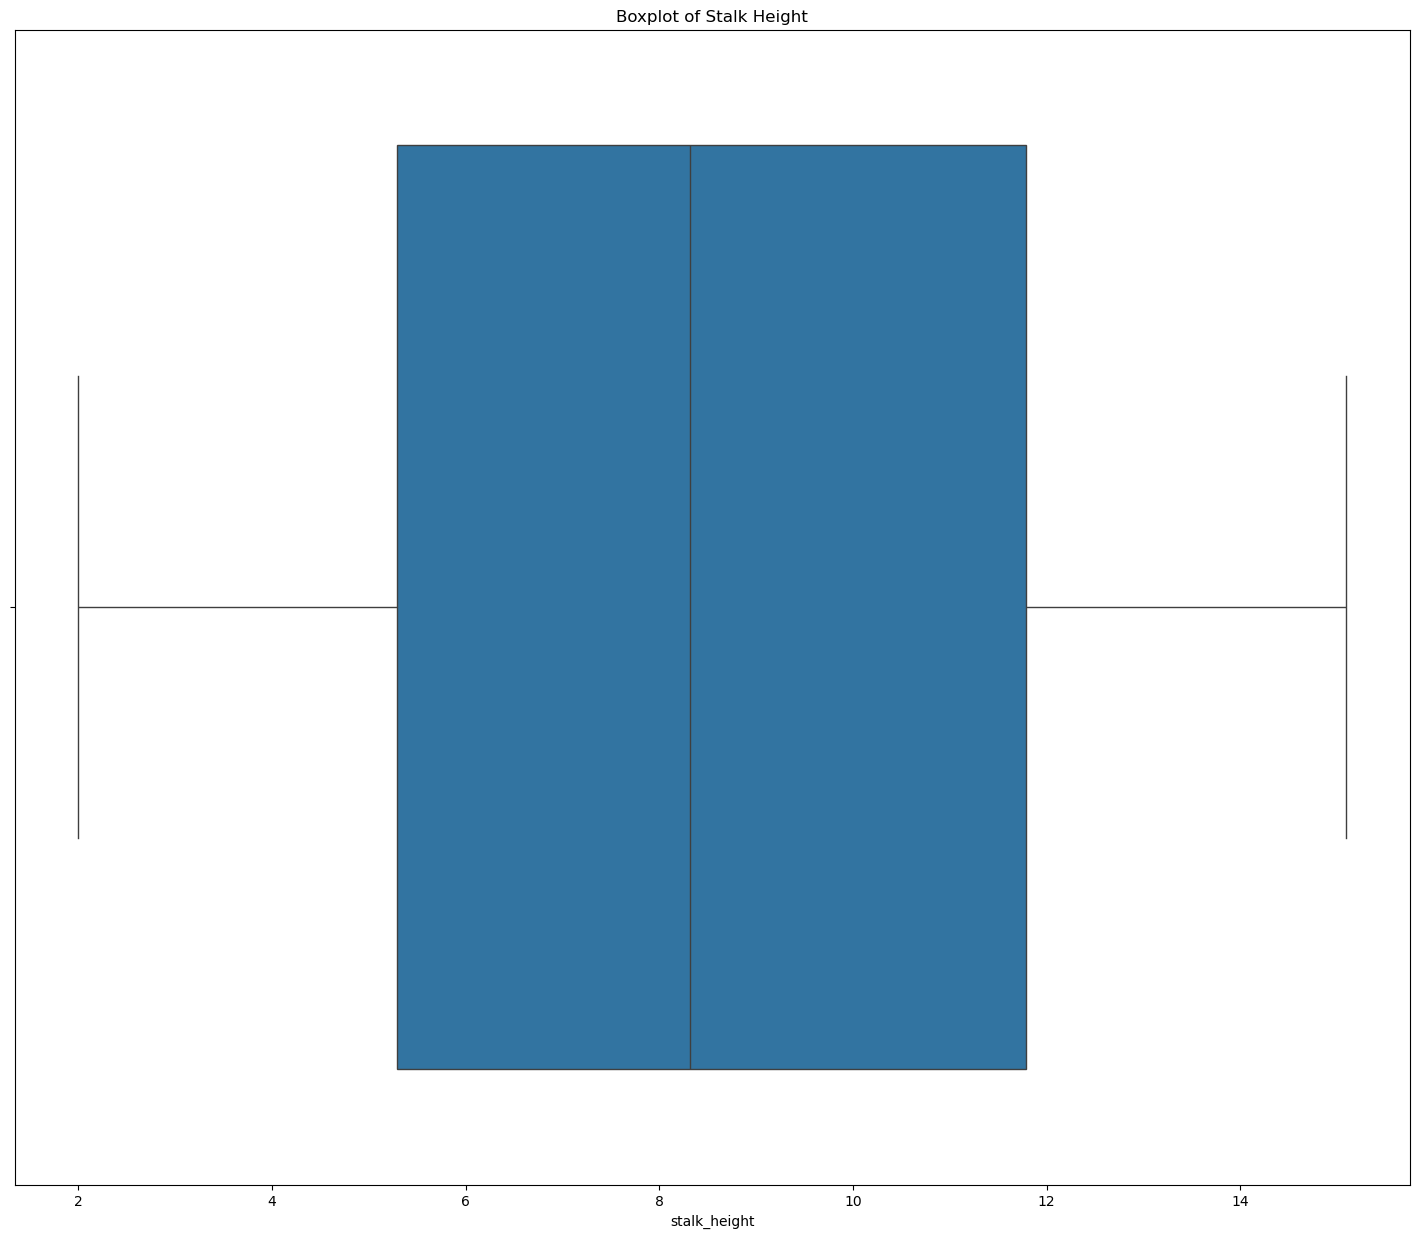

In [8]:
plt.figure(figsize=(18, 15))
sns.boxplot(x=mushroom['stalk_height'])
plt.title('Boxplot of Stalk Height')

Correlation heatmap for numeric columns

Text(0.5, 1.0, 'Correlation Heatmap')

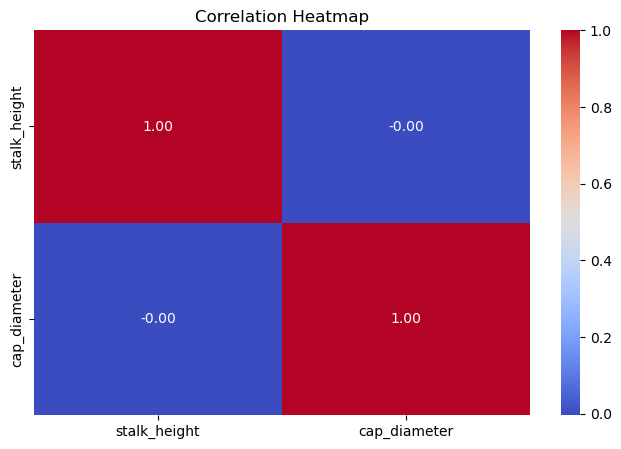

In [9]:
plt.figure(figsize=(8, 5))
numeric_cols = ['stalk_height', 'cap_diameter']
sns.heatmap(mushroom[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

Typeplot for categorical data

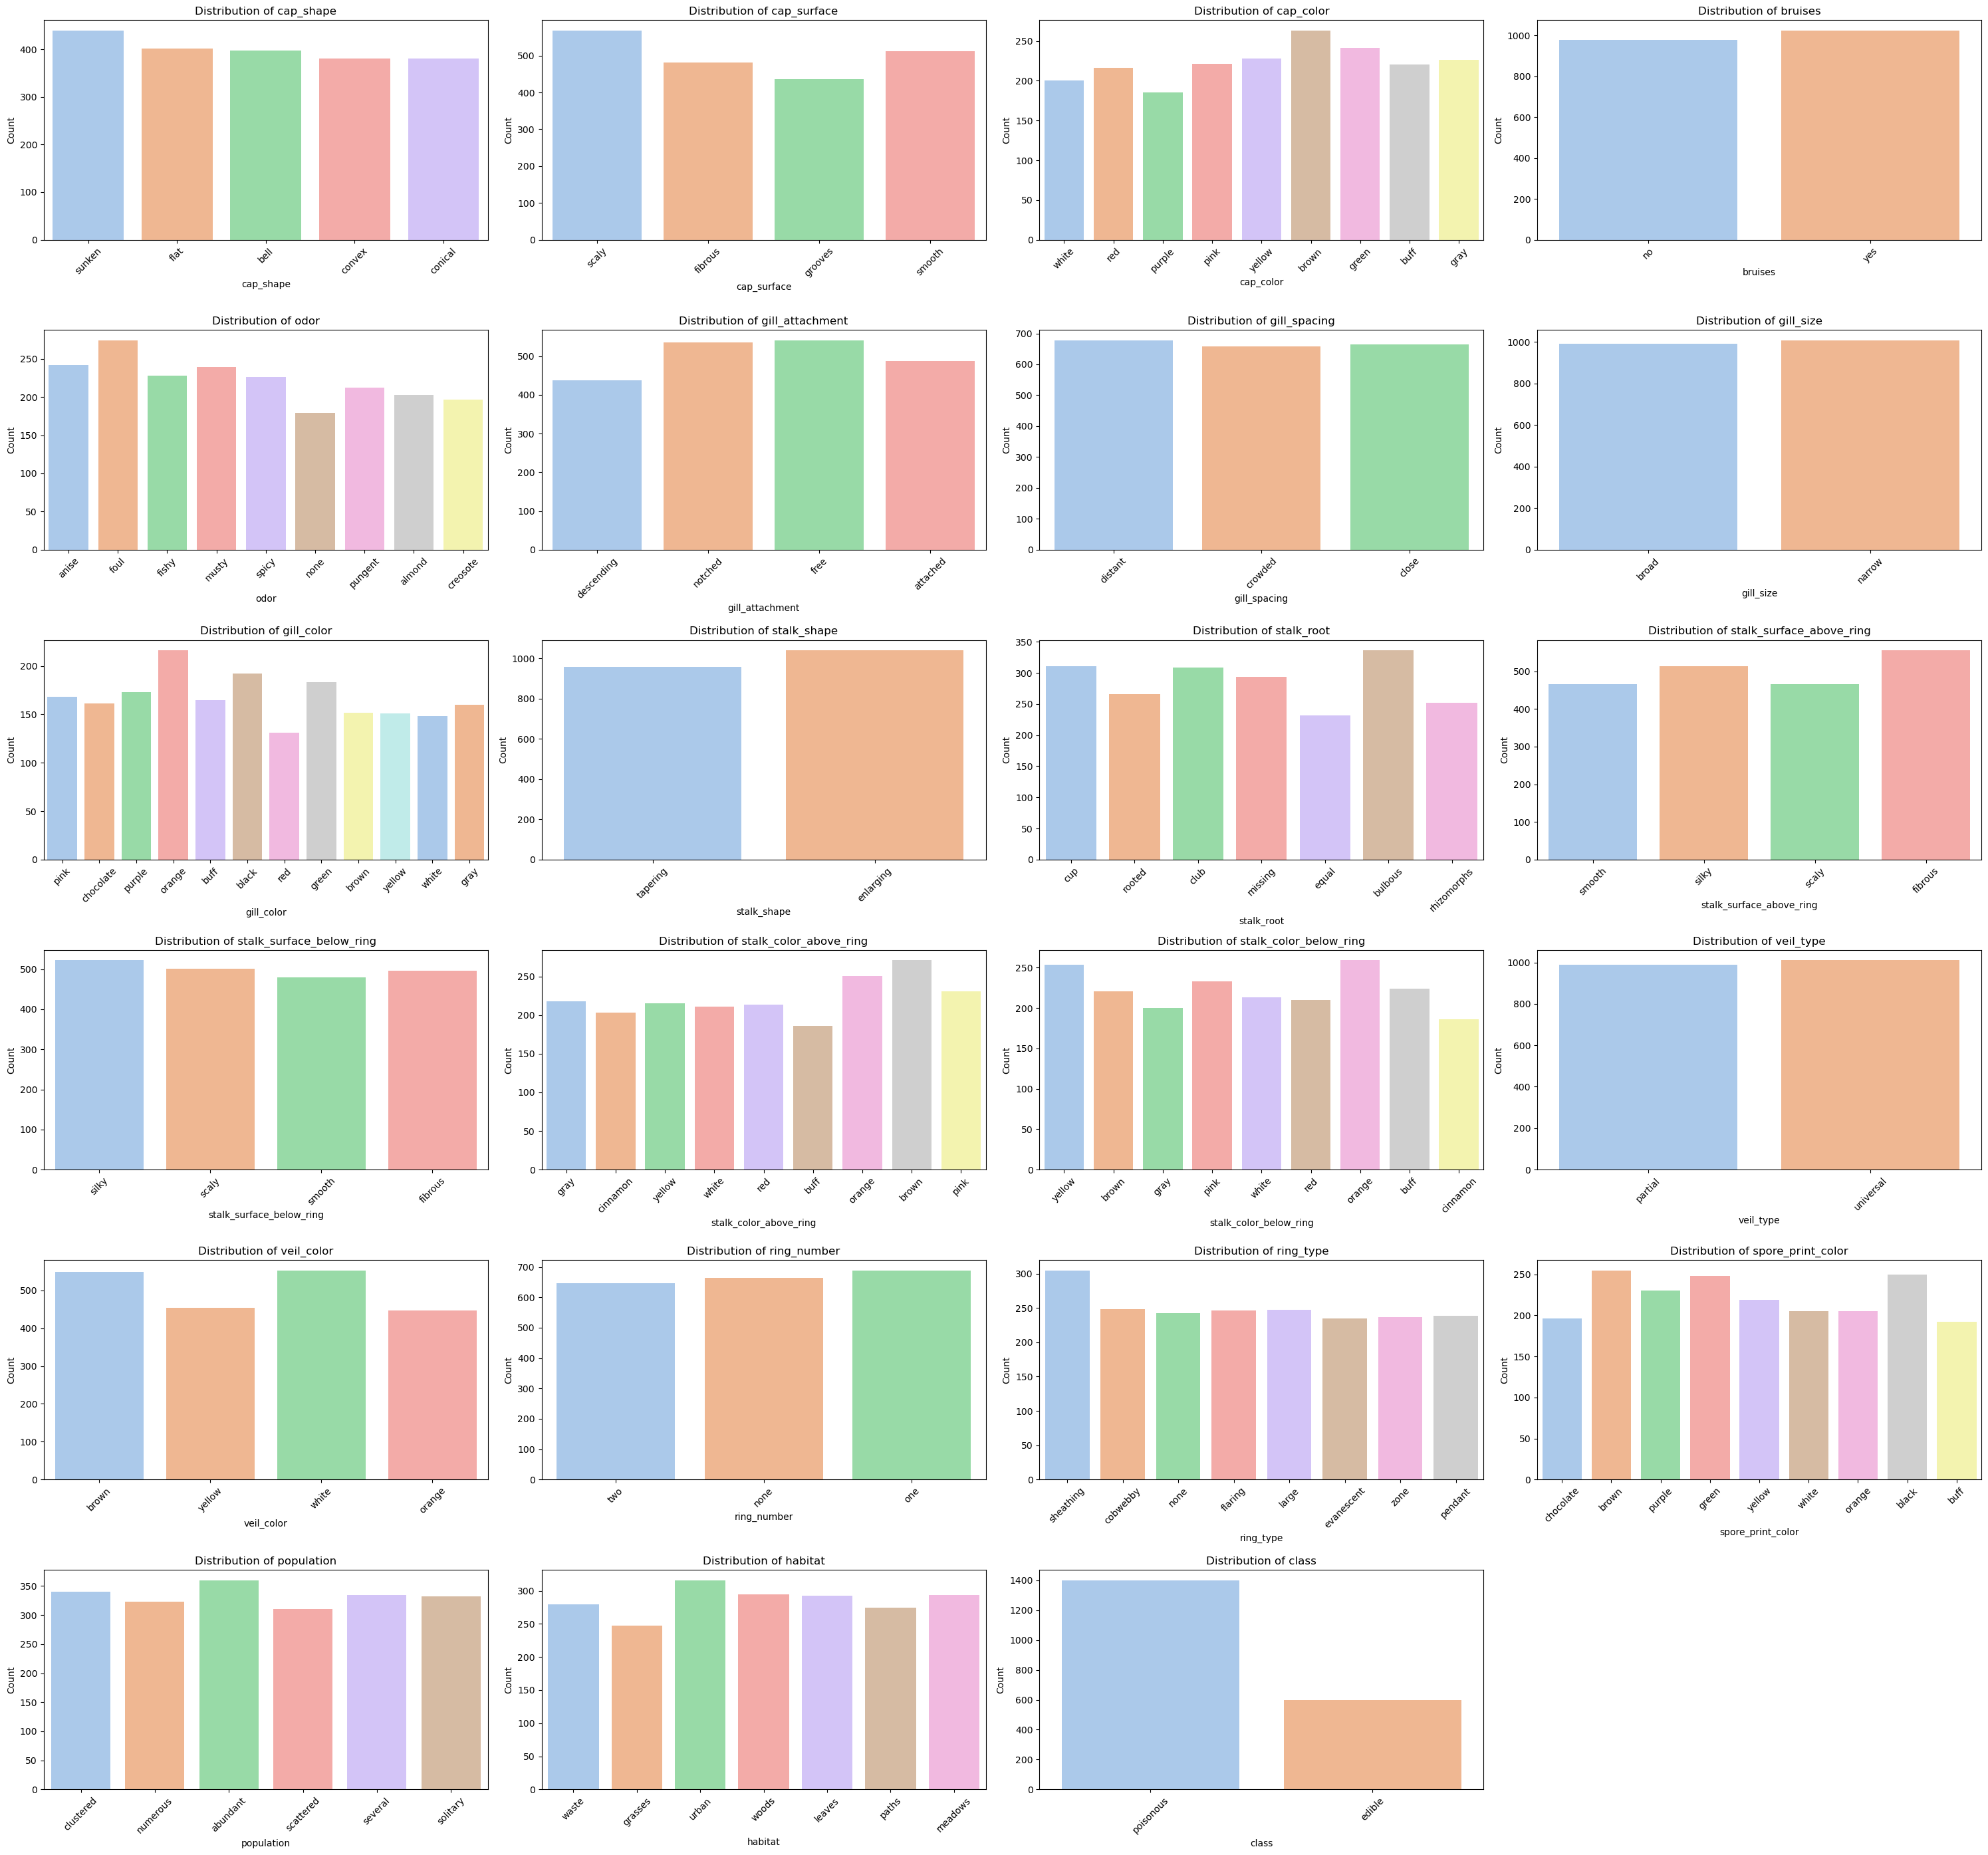

In [16]:
plt.figure(figsize=(30, 28))  # larger height to fit more rows
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 4, i)
    sns.countplot(data=mushroom, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Preprocessing

Encode categorical variables

In [19]:
le = LabelEncoder()
for col in mushroom.select_dtypes(include=['object']).columns:
    mushroom[col] = le.fit_transform(mushroom[col])

Drop 'Unnamed: 0' column as it's not needed becuase it contains index values which is not in proper order

In [20]:
mushroom = mushroom.drop('Unnamed: 0', axis=1)

Split dataset into features (X) and target (y)

In [21]:
X = mushroom.drop('class', axis=1)
y = mushroom['class']

Split into training and testing sets (80% train, 20% test)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the features

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Visualization

Scatter plot of stalk height vs cap diameter colored by class

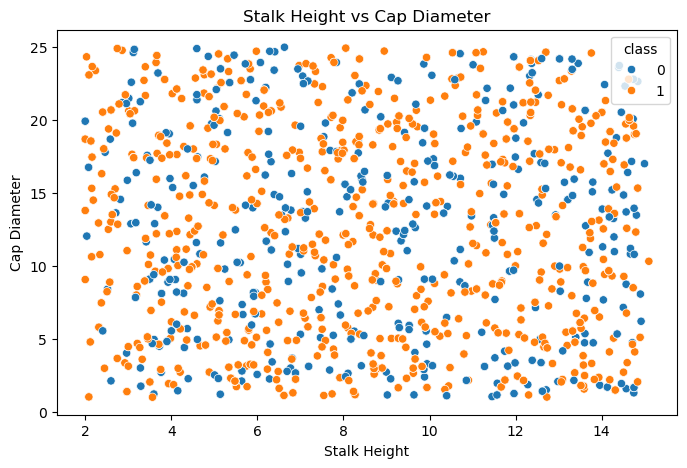

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=mushroom['stalk_height'], y=mushroom['cap_diameter'], hue=mushroom['class'])
plt.title('Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

Class distribution bar plot

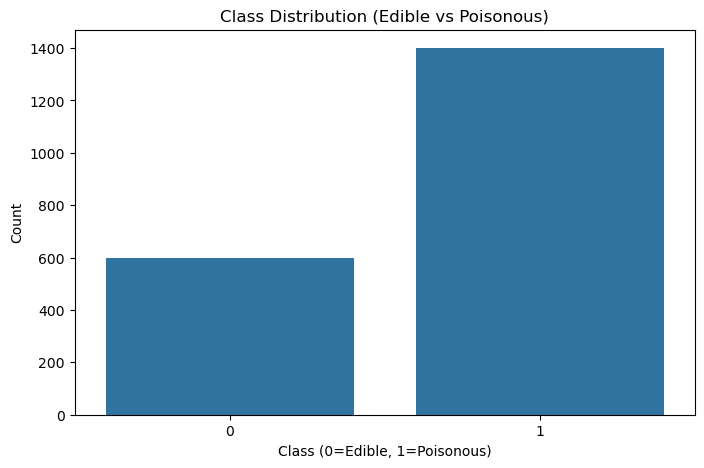

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x=mushroom['class'])
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class (0=Edible, 1=Poisonous)')
plt.ylabel('Count')
plt.show()

# SVM Implementation

Train SVM with linear kernel

In [32]:
svm_linear = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1, random_state=42)

Evaluate on test data

**Note:** because of low accuracy the kernel method has been changed. but there are no changes in nomenclature

In [33]:
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear, average='weighted', zero_division=0)
recall_linear = recall_score(y_test, y_pred_linear, average='weighted', zero_division=0)
f1_linear = f1_score(y_test, y_pred_linear, average='weighted', zero_division=0)

In [34]:
print("\nLinear SVM Performance:")
print(f"Accuracy: {accuracy_linear:.2f}")
print(f"Precision: {precision_linear:.2f}")
print(f"Recall: {recall_linear:.2f}")
print(f"F1-Score: {f1_linear:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear, zero_division=0))


Linear SVM Performance:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-Score: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       133
           1       0.87      0.96      0.91       267

    accuracy                           0.88       400
   macro avg       0.89      0.83      0.85       400
weighted avg       0.88      0.88      0.87       400



# Visualization of SVM Results

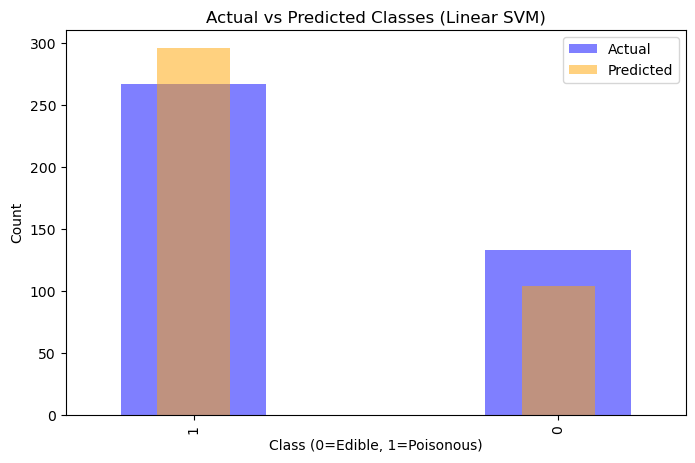

In [38]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
plt.figure(figsize=(8, 5))
results['Actual'].value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Actual', width=0.4)
results['Predicted'].value_counts().plot(kind='bar', color='orange', alpha=0.5, label='Predicted', width=0.2)
plt.title('Actual vs Predicted Classes (Linear SVM)')
plt.xlabel('Class (0=Edible, 1=Poisonous)')
plt.ylabel('Count')
plt.legend()

# Parameter Tuning and Optimization

Try SVM with RBF kernel

In [39]:
svm_rbf = SVC(kernel='rbf', C=1.0, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

SVC(random_state=42)

Evaluate RBF kernel

In [40]:
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted', zero_division=0)
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted', zero_division=0)
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted', zero_division=0)

In [41]:
print("\nRBF SVM Performance:")
print(f"Accuracy: {accuracy_rbf:.2f}")
print(f"Precision: {precision_rbf:.2f}")
print(f"Recall: {recall_rbf:.2f}")
print(f"F1-Score: {f1_rbf:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf, zero_division=0))


RBF SVM Performance:
Accuracy: 0.78
Precision: 0.81
Recall: 0.78
F1-Score: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.37      0.53       133
           1       0.76      0.99      0.86       267

    accuracy                           0.78       400
   macro avg       0.84      0.68      0.69       400
weighted avg       0.81      0.78      0.75       400



Try SVM with different C value (C=10) for linear kernel

In [44]:
svm_linear_c10 = SVC(kernel='linear', C=10, random_state=42)
svm_linear_c10.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear', random_state=42)

Evaluate C=10

In [46]:
y_pred_linear = svm_linear_c10.predict(X_test_scaled)
accuracy_linear1 = accuracy_score(y_test, y_pred_linear)
precision_linear1 = precision_score(y_test, y_pred_linear, average='weighted', zero_division=0)
recall_linear1 = recall_score(y_test, y_pred_linear, average='weighted', zero_division=0)
f1_linear1 = f1_score(y_test, y_pred_linear, average='weighted', zero_division=0)

In [47]:
print("\nPolynomial SVM (C=1.0, degree=3) Performance:")
print(f"Accuracy: {accuracy_linear1:.2f}")
print(f"Precision: {precision_linear1:.2f}")
print(f"Recall: {recall_linear1:.2f}")
print(f"F1-Score: {f1_linear1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear, zero_division=0))


Polynomial SVM (C=1.0, degree=3) Performance:
Accuracy: 0.67
Precision: 0.45
Recall: 0.67
F1-Score: 0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



# Comparison and Analysis

## 1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

### 1. Linear Kernel

   - **Use Case:** When the data is linearly separable.
   - **Performance:** Fast, simple, and performs well if classes can be separated by a straight line (or hyperplane).
   - **Pros:** Low computational cost; interpretable.
   - **Cons:** Poor performance on complex, non-linear data.

### 2. Polynomial Kernel

  - **Use Case:** When the relationship between classes is non-linear and can be captured with polynomial curves.
  - **Performance:** Flexible and can fit curved boundaries; performance depends on the degree of the polynomial.
  - **Pros:** Can model complex relationships.
  - **Cons:** Higher degree may lead to overfitting and slower computation.

### 3. RBF (Radial Basis Function / Gaussian) Kernel

  - **Use Case:** Best for non-linearly separable data where classes are scattered in complex ways.
  - **Performance:** Generally high accuracy for many real-world datasets; most commonly used kernel.
  - **Pros:** Very flexible, handles complex boundaries well.
  - **Cons:** Less interpretable; sensitive to the choice of hyperparameters (C and gamma).

| Kernel     | Linear Separability | Flexibility | Speed  | Common Use                              |
| ---------- | ------------------- | ----------- | ------ | --------------------------------------- |
| Linear     | High                | Low         | Fast   | Text data, linearly separable problems  |
| Polynomial | Medium              | Medium–High | Medium | Image, character recognition            |
| RBF        | Low                 | High        | Slower | Most real-world classification problems |

## 2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

- **Strengths:** SVM is effective for binary classification and can handle non-linear data with kernels like RBF and polynomial.
- **Weaknesses:** SVM can be sensitive to parameter choices and slower with large datasets.
- **Practical Use:** Improved SVM models can accurately classify mushrooms for food safety applications.

## 3. Discuss practical implications of SVM in real-world classification tasks.

**1. Effective in High-Dimensional Spaces**

* SVM performs very well when the number of features is large relative to the number of samples (e.g., text classification, gene expression data).
* It handles **sparse datasets** effectively, making it ideal for document classification and spam filtering.

**2. Robust to Overfitting (with Proper Kernel and Parameters)**

* Using appropriate regularization (`C`) and kernels (e.g., `rbf`, `linear`), SVM can generalize well to unseen data.
* However, poor tuning may lead to overfitting, especially with complex kernels like `poly`.

**3. Versatility via Kernels**

* The **kernel trick** allows SVM to model both linear and non-linear relationships without explicitly transforming data.
* This makes it adaptable to a variety of problem types — from simple to highly complex boundaries.

**4. Not Easily Scalable for Very Large Datasets**

* Training time increases significantly with the size of the dataset, especially for non-linear kernels.
* In big data scenarios, algorithms like **Logistic Regression, Random Forest**, or **deep learning** may be preferred.

**5. Applications Across Domains**

| Domain            | Use Case Example                            |
| ----------------- | ------------------------------------------- |
| Healthcare        | Disease prediction (e.g., cancer detection) |
| Finance           | Credit risk classification                  |
| NLP / Text Mining | Spam detection, sentiment analysis          |
| Image Processing  | Handwritten digit recognition (e.g., MNIST) |
| Bioinformatics    | Gene classification                         |

**6. Sensitive to Feature Scaling**

* SVM is sensitive to the **scale of input features**, so **standardization** or **normalization** is necessary before training.

**7. Interpretability**

* Linear SVMs are relatively interpretable, especially in lower-dimensional spaces.
* However, models with non-linear kernels (like RBF) are often **black boxes**.
